In [2]:
*| code-fold: true
*| echo: true
*| output: false
clear
set seed 1
set obs 100
gen t = _n
tsset t
gen ut = rnormal()*0.01
gen dxt = 0
replace dxt =  .5 *l.dxt + .2 *l.dxt + ut + 0.5*l.ut - 0.25*l.ut if t>2
gen x=sum(dxt)

Number of observations (_N) was 0, now 100.

Time variable: t, 1 to 100
        Delta: 1 unit
(98 real changes made)


In [3]:
*| code-fold: true
*| echo: true

qui: arima x if t<=80, arima(2,1,2) noconstant 
est sto arima_est

In [4]:
*| code-fold: true
*| output: false
*| echo: true
capture forecast clear        // "clears" the last forecast
forecast create arima_predict // Sets the Forecast setup
forecast estimates arima_est, names(Dx) // Names the outcome Dx
forecast identity x = L.x + Dx // reconstructs x (the forecast)
forecast solve, prefix(f_) begin(81) ///
simulate(betas, statistic(stddev, prefix(sd_)) reps(200)) // Forcast and does the simulation

  Forecast model arima_predict started.


  Added estimation results from arima.
  Forecast model arima_predict now contains 1 endogenous variable.
  Forecast model arima_predict now contains 2 endogenous variables.



Computing dynamic forecasts for model arima_predict.
----------------------------------------------------
Starting period:  81
Ending period:    100
Forecast prefix:  f_



81:  ............
82:  ............
83:  ............
84:  ...........
85:  ...........
86:  ...........
87:  ...........
88:  ..........
89:  ..........
90:  ..........
91:  .........
92:  .........
93:  .........
94:  .........
95:  ........
96:  ........
97:  ........
98:  .......
99:  .......
100:  .......

Performing simulations (200): 

.

..

..

....

..

.

..

..

..

..

..

....

..

..

..

..

..

....

..

.

....

..


> .    50
.

....

..

..

..

..

..

...

....

....

..

..

...

....

..

..

....

....

.   100
...

..

.

..

....

..

..

....

....

...

..

....

..

..

....

..

..

...

..   150


....

..

..

..

..

....

....

...

..

..

..

..

..

..

..

...

....

....

..   200



Forecast 2 variables spanning 20 periods.
-----------------------------------------


(80 real changes made)


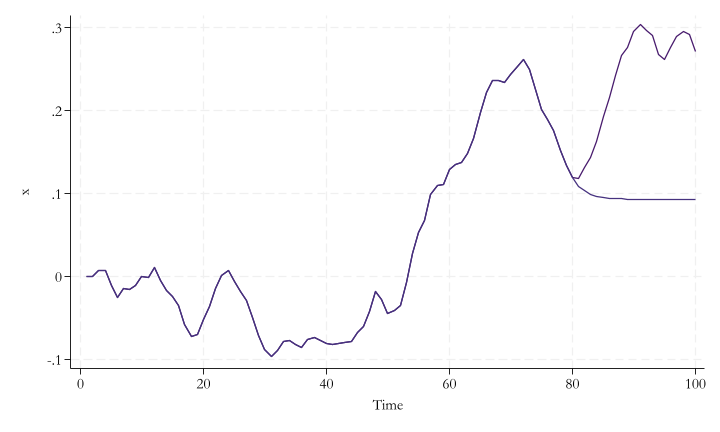

In [5]:
*| code-fold: true
*| echo: true
replace sd_x = 0 if sd_x ==.
generate low = f_x - invnormal(0.975)*sd_x
generate up  = f_x +  invnormal(0.975)*sd_x

color_style viridis
two (rarea low up t, color(gs12)) (line x t  ) ///
     (line f_x t  ),  ///
     ytitle("x") xtitle("Time") legend(off)